<h1>Black Friday Sales EDA </h1>



About this Dataset
Dataset History

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [120]:
import sys
assert sys.version_info >= (3, 5) 

In [121]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [122]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [123]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [124]:
bf = pd.read_csv("/Users/kevinc/Desktop/F21DL Data Mining Machine Learning/BlackFridaySale.csv")

In [125]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [126]:
bf.isnull().sum()
#only Product_Category_2 and Product_Category_3 has null value.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [127]:
bf['Gender']=bf['Gender'].map({'M':1,'F':0})

Change Gender Male to 1, Female to 0

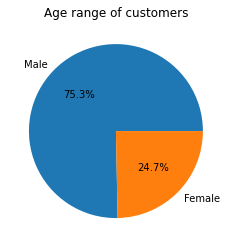

In [128]:
labels=['Male','Female']
plt.pie(bf.Gender.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Age range of customers')
plt.show()

In [129]:
pd.unique(bf['City_Category'])

array(['A', 'C', 'B'], dtype=object)

In [130]:
bf['City_Category']=bf['City_Category'].map({'A':0,'B':1,'C':2})

In [131]:
bf.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,2,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,1,26-35,15,0,3,0,1,2.0,NaN,15227
6,1000004,P00184942,1,46-50,7,1,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,46-50,7,1,2,1,1,15.0,NaN,15854
8,1000004,P0097242,1,46-50,7,1,2,1,1,16.0,NaN,15686
9,1000005,P00274942,1,26-35,20,0,1,1,8,NaN,NaN,7871


In [132]:
bf["Product_ID"].nunique()

3631

In [133]:
#show all rows with has the product id P00069042
df=bf.loc[bf["Product_ID"]=="P00069042"]
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,0,2,0,3,NaN,NaN,8370
825,1000149,P00069042,1,26-35,1,1,2,1,3,NaN,NaN,10715
3314,1000541,P00069042,0,18-25,4,2,3,0,3,NaN,NaN,11037
4224,1000698,P00069042,1,18-25,4,0,1,0,3,NaN,NaN,8009
5864,1000951,P00069042,1,46-50,2,1,4+,1,3,NaN,NaN,13346
...,...,...,...,...,...,...,...,...,...,...,...,...
539484,1005061,P00069042,0,18-25,19,2,2,1,3,NaN,NaN,13483
540849,1005284,P00069042,1,26-35,16,2,1,0,3,NaN,NaN,10895
543419,1005667,P00069042,1,36-45,7,1,1,1,3,NaN,NaN,11047
544454,1005812,P00069042,0,26-35,7,0,1,1,3,NaN,NaN,13557


In [134]:
bf["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [135]:
bf["User_ID"].nunique()


5891

In [136]:
bf["User_ID"].value_counts() #count the number of time each unique value appeared

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [137]:
bf.describe()

,User_ID,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,0.753105,8.076707,1.042640,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,0.431205,6.522660,0.760211,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,0.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,1.000000,7.000000,1.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,1.000000,14.000000,2.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,1.000000,20.000000,2.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


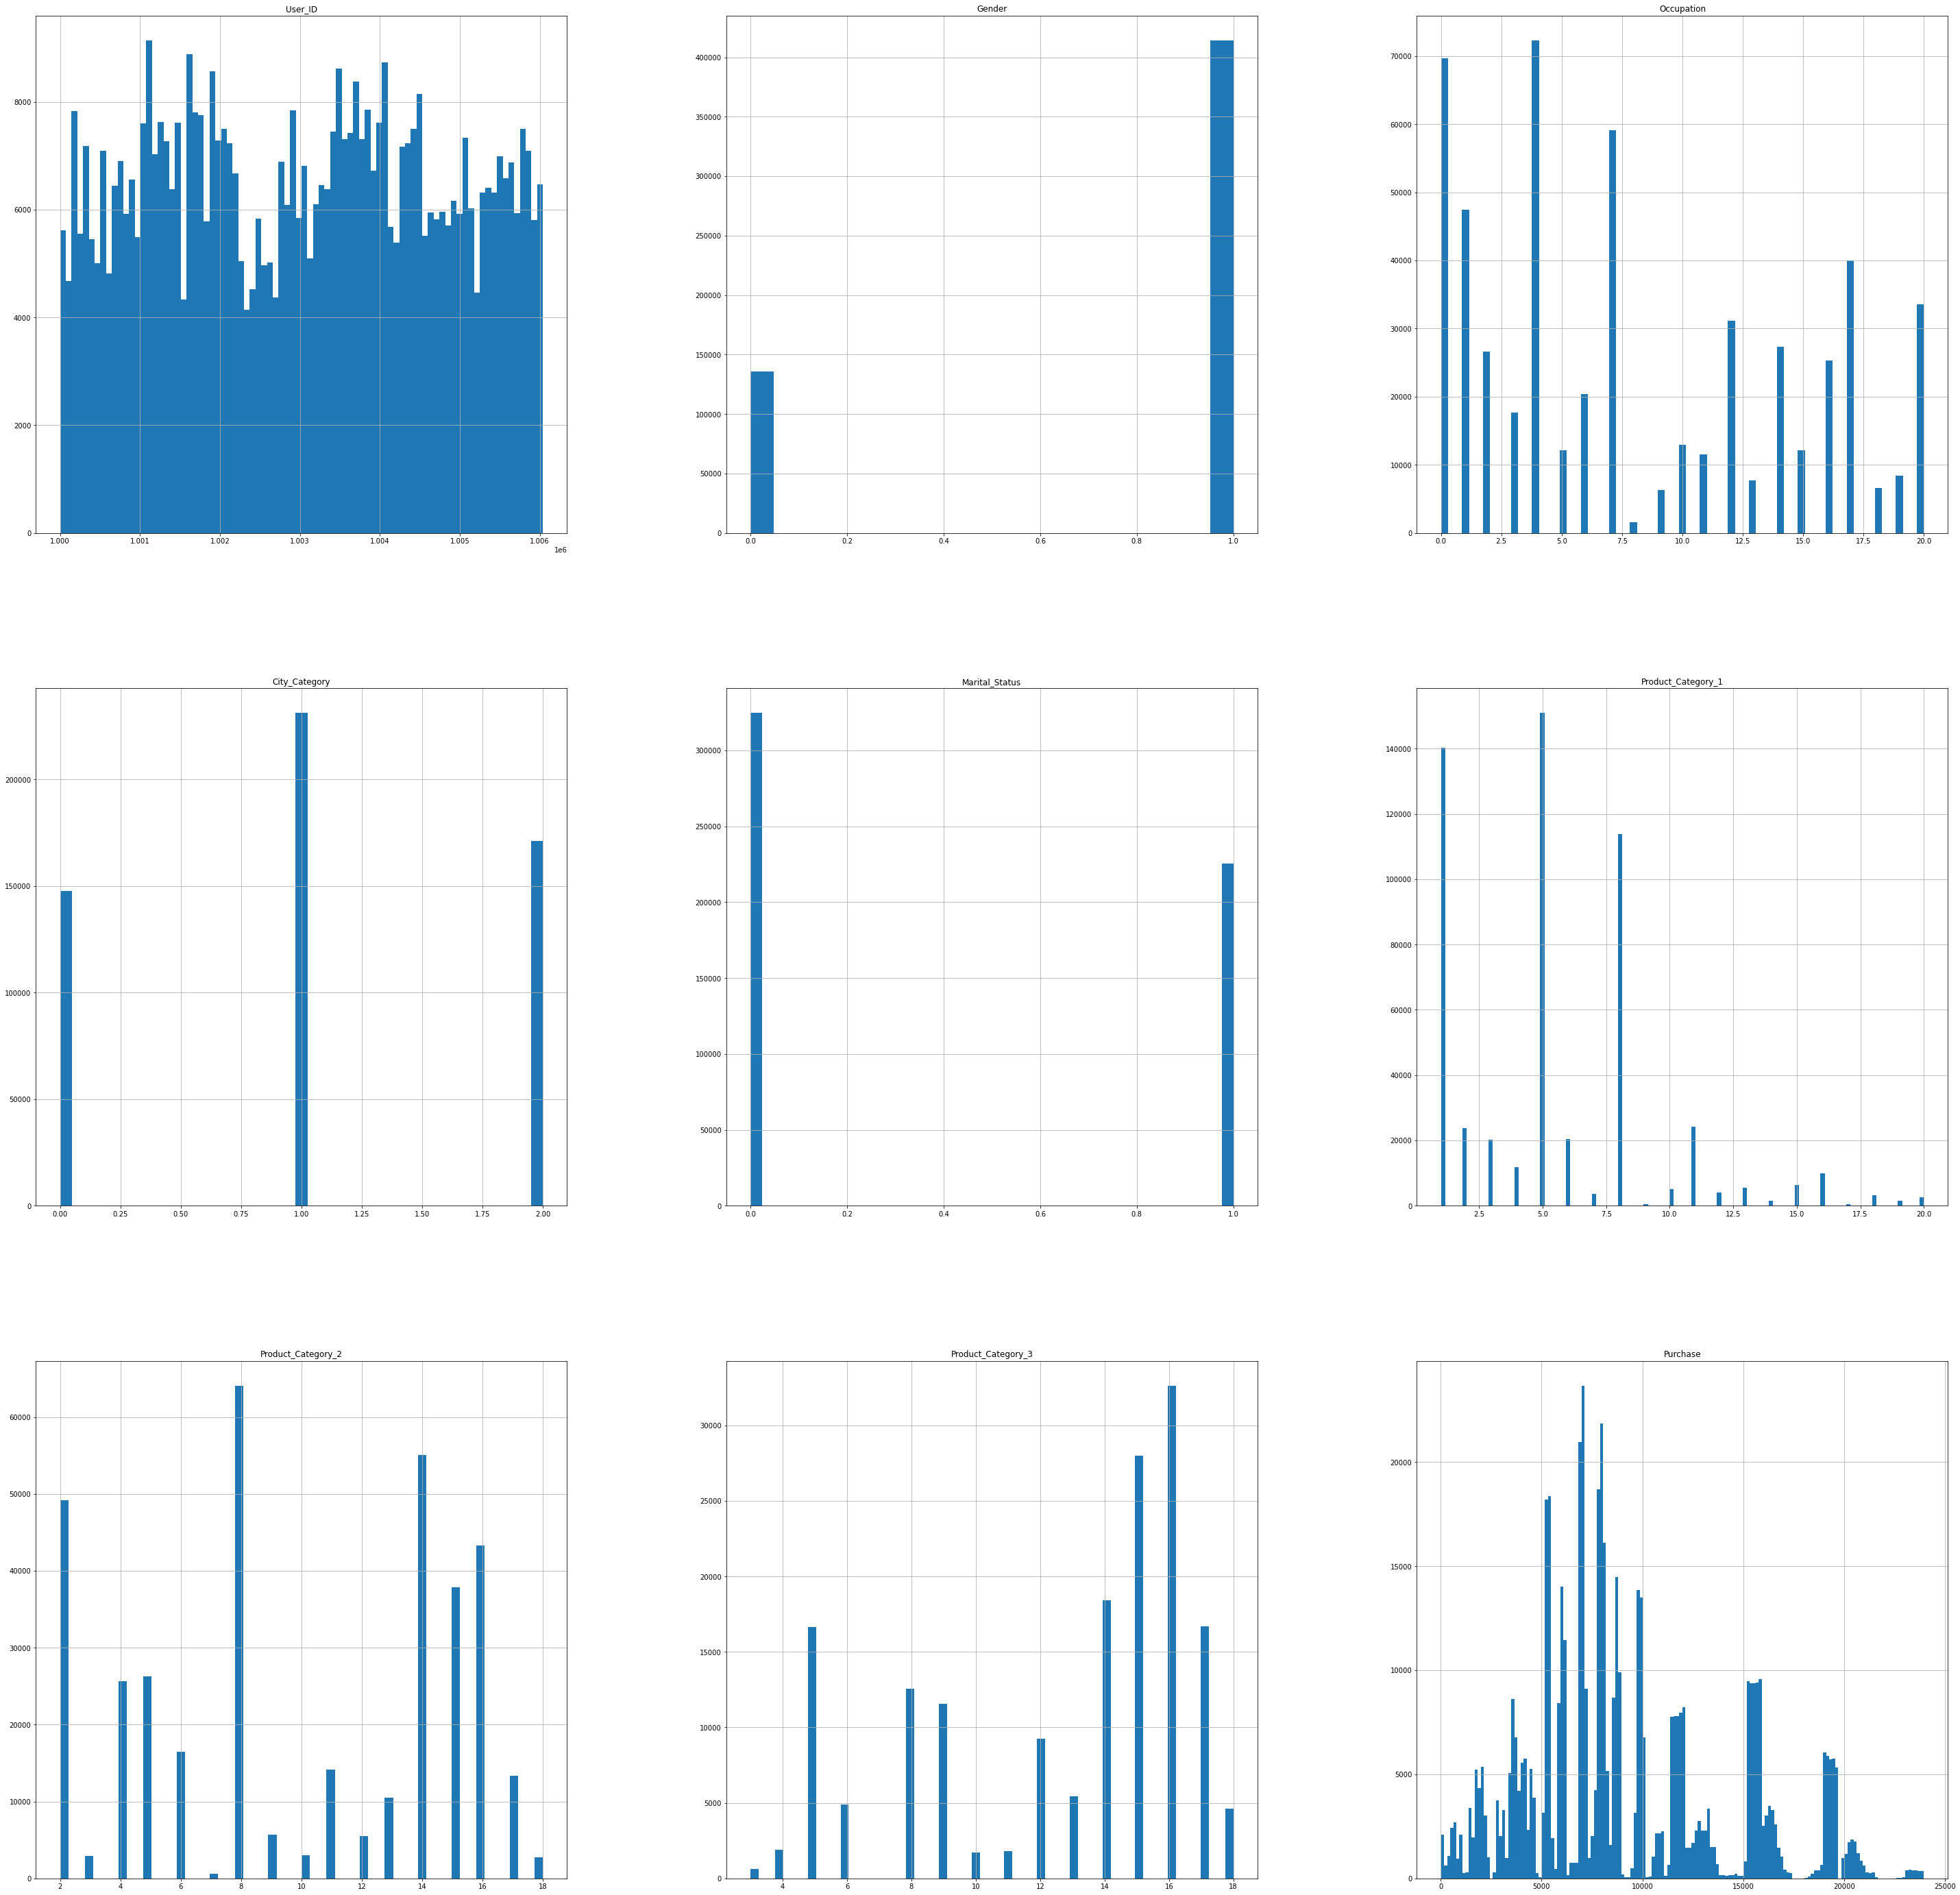

In [138]:
%matplotlib inline
bf.hist(bins='auto', figsize=(50,50))
plt.show()

In [139]:
bf['Age'].value_counts().index

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

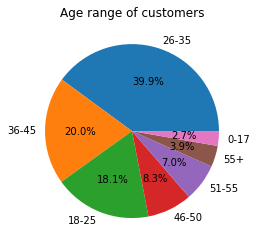

In [140]:
labels=bf['Age'].value_counts().index
plt.pie(bf.Age.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Age range of customers')
plt.show()

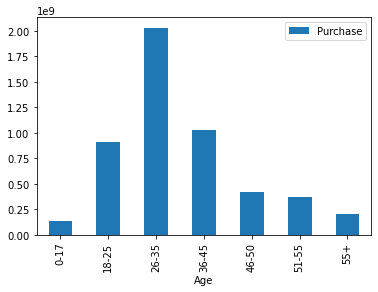

In [141]:
#create a graph with age and total purchase

bf.groupby('Age')['Purchase'].sum().plot(kind='bar')
plt.legend()

In [142]:
bf['Age']=bf['Age'].map({'26-35':2, '36-45':3, '18-25':1, '46-50':4, '51-55':5, '55+':6, '0-17':0})   #way to automatic this?


array([[<AxesSubplot:xlabel='Purchase', ylabel='Purchase'>,
        <AxesSubplot:xlabel='Gender', ylabel='Purchase'>,
        <AxesSubplot:xlabel='User_ID', ylabel='Purchase'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='User_ID', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='User_ID'>,
        <AxesSubplot:xlabel='Gender', ylabel='User_ID'>,
        <AxesSubplot:xlabel='User_ID', ylabel='User_ID'>]], dtype=object)

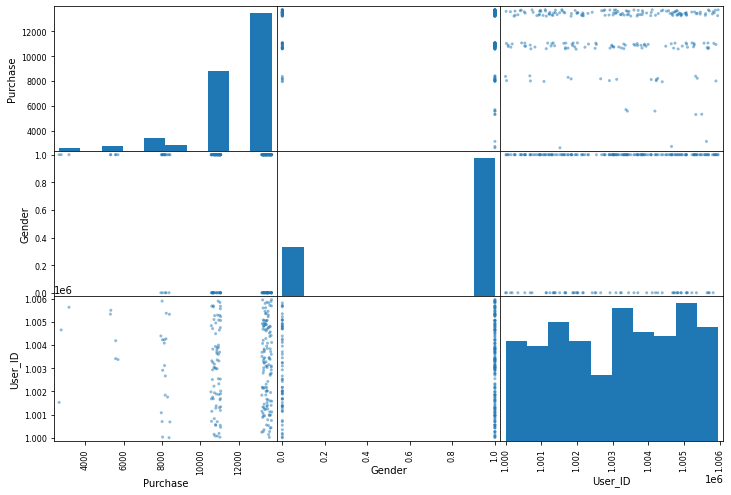

In [146]:
from pandas.plotting import scatter_matrix

Attributes=['Purchase','Age','Gender','User_ID']
scatter_matrix(df[Attributes],figsize=(12,8))

In [ ]:
bf=bf.drop(['Product_Category_3','Product_Category_2','Product_Category_1'],axis=1)



In [ ]:
bf.head()

In [ ]:
corr_matrix=bf.corr()

In [ ]:
corr_matrix['Purchase'].sort_values(ascending=False)     #need to convert age to categorical

In [ ]:

from pandas.plotting import scatter_matrix

Attributes=['Purchase','Age']
scatter_matrix(bf[Attributes],figsize=(12,8))


T2

In [ ]:
bf.head()

In [ ]:
a=bf['Product_Category_1'].unique()
a.sort()
a

In [ ]:
a=bf['Product_Category_2'].unique()
a.sort()
a

In [ ]:
from pandas.plotting import scatter_matrix

Attributes=['Purchase','Product_Category_3','Product_Category_2','Product_Category_1']
scatter_matrix(df[Attributes],figsize=(12,8))
